# **Prediction Analysis on Stroke**

## **Problem statement**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. 

Each row in the data provides relavant information about the patient.





In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
#uploading the dataset from github
url = "https://raw.githubusercontent.com/Chinaazam/Xhinaza/main/healthcare-dataset-stroke-data%201.csv"
stroke = pd.read_csv(url)


In [ ]:

stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke.shape

(5110, 12)

In [ ]:
#dropping null values from the rows
drop_stroke = stroke.dropna(axis = 'rows')
drop_stroke.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [ ]:
drop_stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
drop_stroke.duplicated().sum()

0

# **EDA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e8e003730>,
      dtype=object)

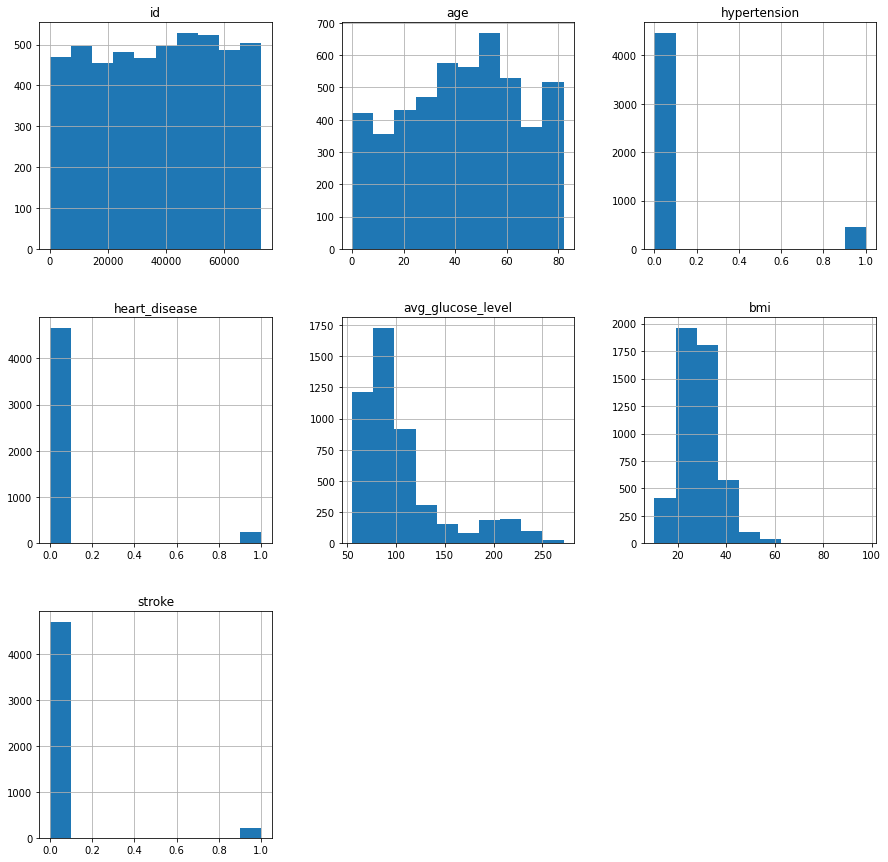

In [ ]:
# Histogram for numerical columns to show the skewness of the data
drop_stroke.hist(figsize = (15,15), alpha = 1)

[Text(0.5, 1.0, 'Age vs Stroke')]

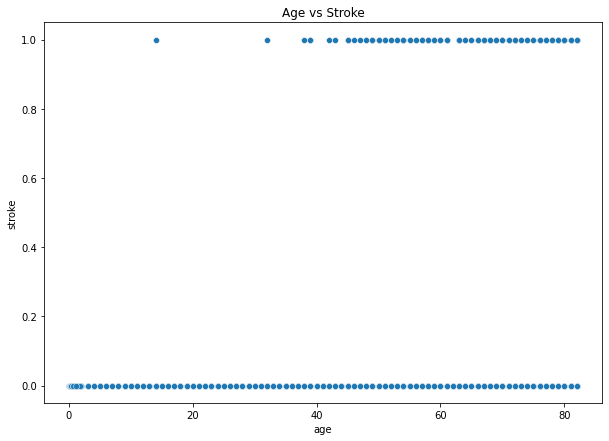

In [ ]:
# Scatter plot of age with stroke
plt.figure(figsize =(10,7))
sns.scatterplot(x= 'age', y = 'stroke', data = drop_stroke).set(title= "Age vs Stroke")

The outplut above shows that we cannot use the linear regression model in our prediction


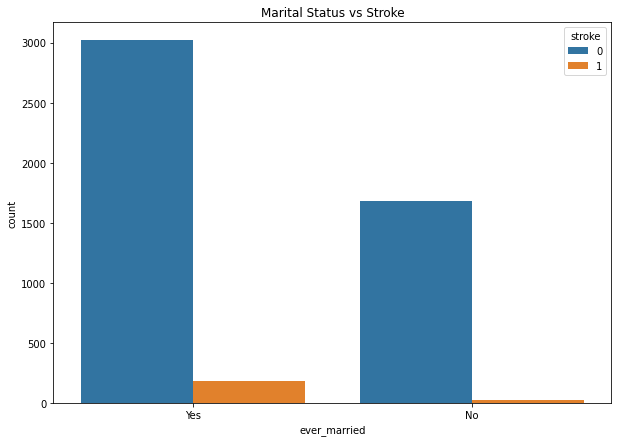

In [ ]:
# Count plot of marital status with stroke
plt.figure(figsize =(10,7))
sns.countplot(x = 'ever_married', data = drop_stroke, hue = 'stroke').set(title= "Marital Status vs Stroke")
plt.show()

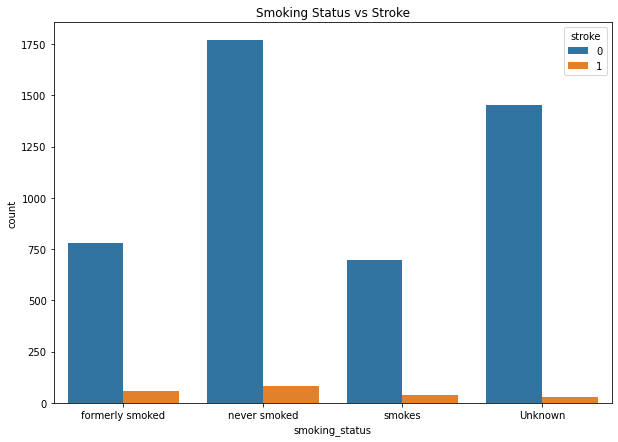

In [ ]:
# # Count plot of smoking status with stroke
plt.figure(figsize =(10,7))
sns.countplot(x = 'smoking_status', data = drop_stroke, hue = 'stroke').set(title= "Smoking Status vs Stroke")
plt.show()

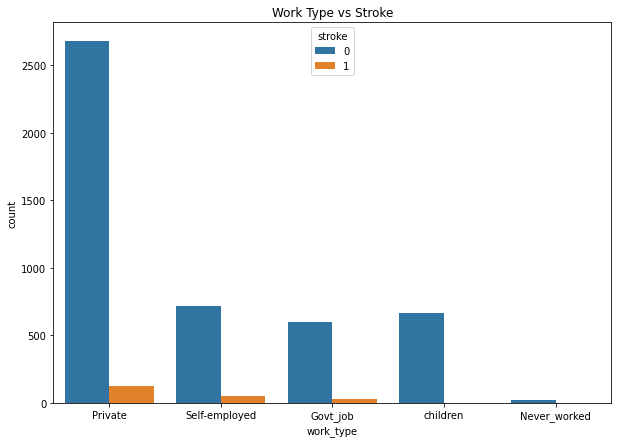

In [ ]:
# Count plot of work type with stroke
plt.figure(figsize =(10,7))
sns.countplot(x = 'work_type', data = drop_stroke, hue = 'stroke').set(title= "Work Type vs Stroke")
plt.show()

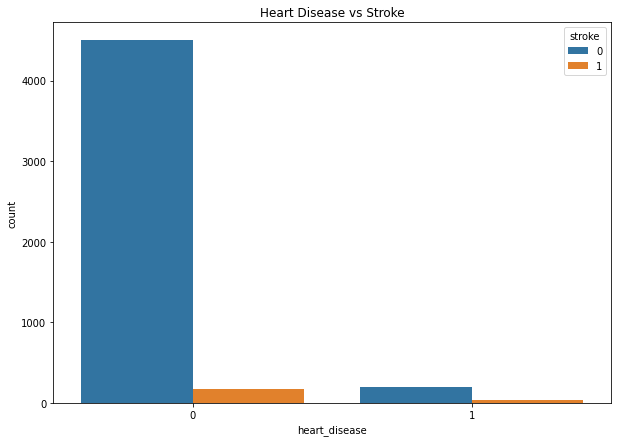

In [ ]:
# Count plot of heart disease with stroke
plt.figure(figsize =(10,7))
sns.countplot(x = 'heart_disease', data = drop_stroke, hue = 'stroke').set(title= "Heart Disease vs Stroke")
plt.show()

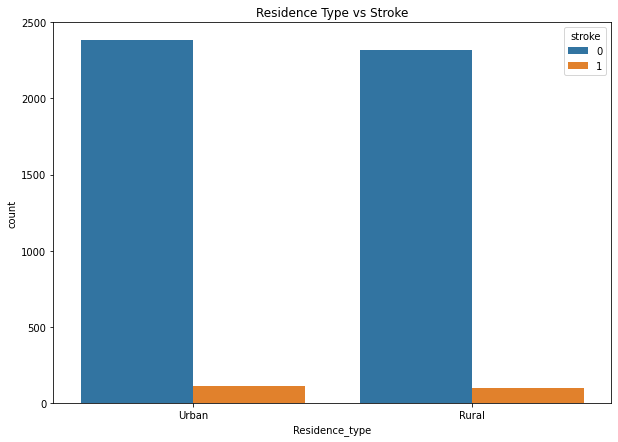

In [ ]:
# Count plot of residence type with stroke
plt.figure(figsize =(10,7))
sns.countplot(x = 'Residence_type', data = drop_stroke, hue = 'stroke').set(title= "Residence Type vs Stroke")
plt.show()

In [ ]:

drop_stroke.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

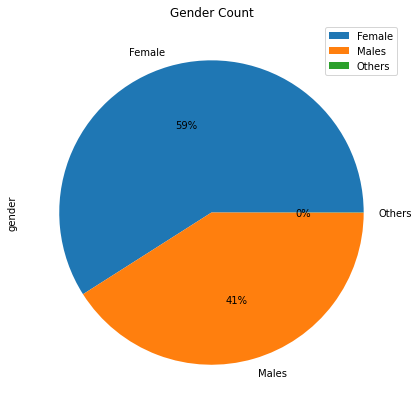

In [ ]:
plt.figure(figsize = (10,7))
drop_stroke.gender.value_counts().plot(kind = 'pie', labels = ['Female', 'Males', 'Others'], autopct = '%1.0f%%')
plt.title('Gender Count')
plt.legend()
plt.show()

In [ ]:
# Gender counts with stroke
Gender_count = drop_stroke.groupby('gender')['stroke'].value_counts()
Gender_count

gender  stroke
Female  0         2777
        1          120
Male    0         1922
        1           89
Other   0            1
Name: stroke, dtype: int64

# **Label Encoding** ⬇ 

In [ ]:
input = drop_stroke.copy() # Features
input

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_married = LabelEncoder()
le_work = LabelEncoder()
le_residence = LabelEncoder()
le_smoking = LabelEncoder()

In [ ]:
input['gender_x'] = le_gender.fit_transform(input['gender'])
input['married_x'] = le_married.fit_transform(input['ever_married'])
input['work_x'] = le_work.fit_transform(input['work_type'])
input['residence_x'] = le_residence.fit_transform(input['Residence_type'])
input['smoking_x'] = le_smoking.fit_transform(input['smoking_status'])

In [ ]:
input.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_x,married_x,work_x,residence_x,smoking_x
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,2,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,3,0,2
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,2,1,1


In [ ]:
drop_text = input.drop(["gender", "ever_married", "work_type","Residence_type", "smoking_status"], axis = "columns")
drop_text

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_x,married_x,work_x,residence_x,smoking_x
0,9046,67.0,0,1,228.69,36.6,1,1,1,2,1,1
2,31112,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,60182,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,1665,79.0,1,0,174.12,24.0,1,0,1,3,0,2
5,56669,81.0,0,0,186.21,29.0,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0,0,0,4,0,0
5106,44873,81.0,0,0,125.20,40.0,0,0,1,3,1,2
5107,19723,35.0,0,0,82.99,30.6,0,0,1,3,0,2
5108,37544,51.0,0,0,166.29,25.6,0,1,1,2,0,1


# **Feature Selection**

Using Feature selection to find the best set of features for building our models



In [ ]:
#importing the necessary modules from scikit learn library
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif
#using the feature selection technique to select the best set of features of 70%
featureSelection = SelectPercentile(score_func=chi2, percentile = 70)
x = drop_text.drop(['stroke'], axis = 'columns')
y = drop_text['stroke']
x = featureSelection.fit_transform(x,y)
print(x.shape)

(4909, 7)


In [ ]:
#print the output of the feature selection technique
print(featureSelection.get_support())

[ True  True  True  True  True  True False  True False False False]


### **age, hypertension, heart_disease, avg_glucose_level, bmi, gender_x will be our features for machine learning modeling**

In [ ]:
# Features for Machine Learning Model
X = drop_text[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_x']]
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_x
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,0
4,79.0,1,0,174.12,24.0,0
5,81.0,0,0,186.21,29.0,1


In [ ]:
#import the train_test_split module to train 30% of the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)


# **Model 1: Logistic** **Regression** 

In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pre = model.predict(X_test)
y_pre

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test,y_test)

0.9581029967995345

### **Confusion Matrix**

Text(33.0, 0.5, 'Actual ')

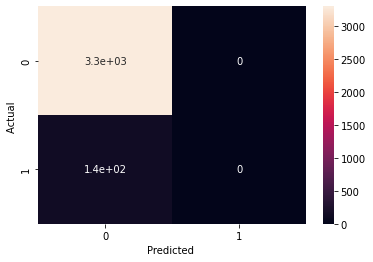

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pre)

sns.heatmap(cm, annot = True)
plt.xlabel('Predicted ')
plt.ylabel('Actual ')

### **Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3293
           1       0.00      0.00      0.00       144

    accuracy                           0.96      3437
   macro avg       0.48      0.50      0.49      3437
weighted avg       0.92      0.96      0.94      3437



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Model 2: Decision Tree**

In [ ]:

from sklearn import tree
tree.DecisionTreeClassifier()
Model = tree.DecisionTreeClassifier()

In [ ]:
Model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = Model.predict(X_test)

In [ ]:
Model.score(X_test, y_test)

0.9176607506546407

### **Confusion Matrix**

Text(33.0, 0.5, 'Actual ')

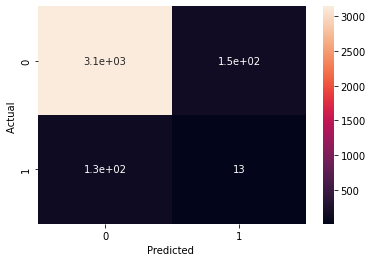

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)
plt.xlabel('Predicted ')
plt.ylabel('Actual ')

### **Classification Report**

In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3293
           1       0.08      0.09      0.08       144

    accuracy                           0.92      3437
   macro avg       0.52      0.52      0.52      3437
weighted avg       0.92      0.92      0.92      3437



# **Model 3: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test, y_test)

0.9569391911550771

## **Confusion Matrix**

Text(33.0, 0.5, 'Actual ')

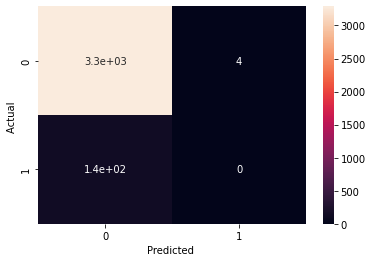

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot = True)
plt.xlabel('Predicted ')
plt.ylabel('Actual ')

### **Classification Report**

In [ ]:
Report=classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3293
           1       0.00      0.00      0.00       144

    accuracy                           0.96      3437
   macro avg       0.48      0.50      0.49      3437
weighted avg       0.92      0.96      0.94      3437



# **Conclusion and Suggestions**

1. From the histogram distribution, it shows that people that are between 40 to 60 years are more prone to get affected by stroke.

2. Patients with heart disease are more prone to stroke, if we could get more data of people with other disease against having a stroke we can then come to a conclusion that probably people with other diseases are prone to a stroke or not.

3. Hypertensive patients almost always end up having a stroke.

4. Random Forest and Logistic  regression have the highest score after evaluation and therefore can be concluded as the best model for this dataset compared with Decision tree